# **Question 1: XOR Gate Classification**

1. Create the XOR Truth Table Dataset

In [9]:
import numpy as np

# XOR truth table dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

2. Single-Layer Perceptron (MCP Neuron) Implementation

In [10]:
class MCPNeuron:
    def __init__(self, input_size, learning_rate=0.1):
        # Initialize weights and learning rate
        self.weights = np.zeros(input_size)
        self.learning_rate = learning_rate

    def activation(self, weighted_sum):
        # Step function for binary classification
        return 1 if weighted_sum >= 0 else 0

    def predict(self, inputs):
        # Calculate weighted sum
        weighted_sum = np.dot(inputs, self.weights)
        return self.activation(weighted_sum)

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for i in range(len(X)):
                prediction = self.predict(X[i])
                error = y[i] - prediction
                # Update weights based on error
                self.weights += self.learning_rate * error * X[i]
            print(f"Epoch {epoch+1}/{epochs}, Weights: {self.weights}")

# Instantiate and train MCPNeuron
mcp = MCPNeuron(input_size=2)
mcp.train(X, y, epochs=10)

# Test the SLP on XOR data
for i in range(len(X)):
    print(f"Input: {X[i]}, Predicted Output: {mcp.predict(X[i])}, Actual Output: {y[i]}")

Epoch 1/10, Weights: [-0.1 -0.1]
Epoch 2/10, Weights: [-0.1 -0.1]
Epoch 3/10, Weights: [-0.1 -0.1]
Epoch 4/10, Weights: [-0.1 -0.1]
Epoch 5/10, Weights: [-0.1 -0.1]
Epoch 6/10, Weights: [-0.1 -0.1]
Epoch 7/10, Weights: [-0.1 -0.1]
Epoch 8/10, Weights: [-0.1 -0.1]
Epoch 9/10, Weights: [-0.1 -0.1]
Epoch 10/10, Weights: [-0.1 -0.1]
Input: [0 0], Predicted Output: 1, Actual Output: 0
Input: [0 1], Predicted Output: 0, Actual Output: 1
Input: [1 0], Predicted Output: 0, Actual Output: 1
Input: [1 1], Predicted Output: 0, Actual Output: 0


3. Multi-Layer Perceptron (MLP) Implementation

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the MLP model
mlp_model = Sequential([
    Dense(2, input_dim=2, activation='relu'),  # Hidden layer with 2 neurons
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron
])

# Compile the model
mlp_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the MLP on XOR data
mlp_model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the MLP on the XOR dataset
_, accuracy = mlp_model.evaluate(X, y)
print(f"MLP Accuracy: {accuracy * 100:.2f}%")

# Test the MLP on XOR data
predictions = mlp_model.predict(X)
print("MLP Predictions on XOR data:", np.round(predictions).flatten())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.7500 - loss: 0.5385
MLP Accuracy: 75.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
MLP Predictions on XOR data: [0. 0. 1. 0.]


4. Visualizing the MLP's Decision Boundary

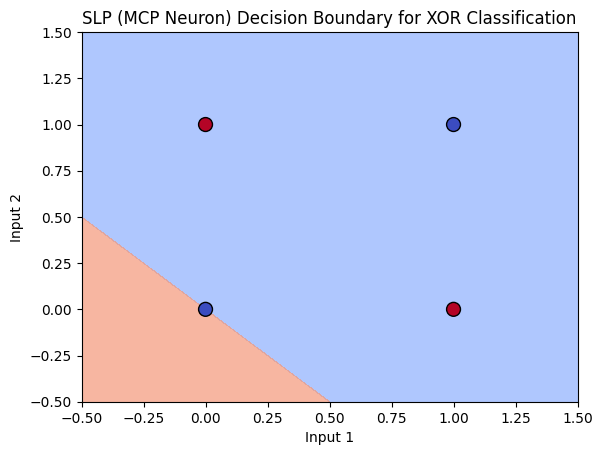

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


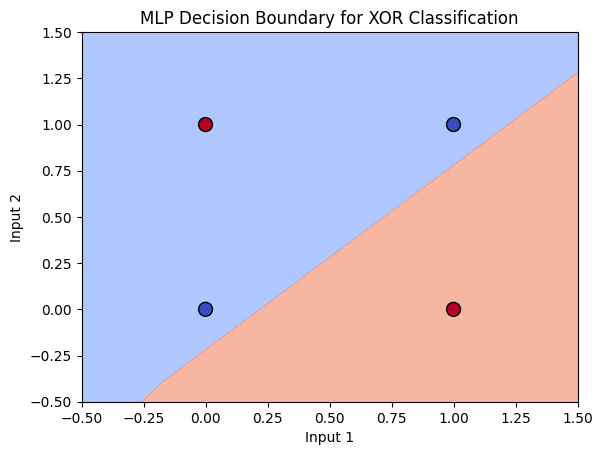

In [13]:
# Visualizing the SLP Decision Boundary
def plot_slp_decision_boundary(mcp, X, y):
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([mcp.predict(point) for point in grid_points])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.7, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
    plt.title("SLP (MCP Neuron) Decision Boundary for XOR Classification")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

# Plotting SLP Decision Boundary
plot_slp_decision_boundary(mcp, X, y)

# Visualizing the MLP Decision Boundary
def plot_mlp_decision_boundary(mlp_model, X, y):
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = mlp_model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.7, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
    plt.title("MLP Decision Boundary for XOR Classification")
    plt.xlabel("Input 1")
    plt.ylabel("Input 2")
    plt.show()

# Plotting MLP Decision Boundary
plot_mlp_decision_boundary(mlp_model, X, y)

EXPLANATION

Single Layer Perceptron: The SLP with MCP Neurons struggles with the XOR problem because XOR is not linearly separable.

Multi-Layer Perceptron: The MLP uses a hidden layer, allowing it to learn a non-linear decision boundary that successfully classifies the XOR gate.

Visualization: We will observe incorrect predictions due to the limitations of a single-layer perceptron.
The MLP's decision boundary is plotted to show how it separates the input space correctly.

# **Question 2: A. Sentiment Analysis Twitter Airline**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


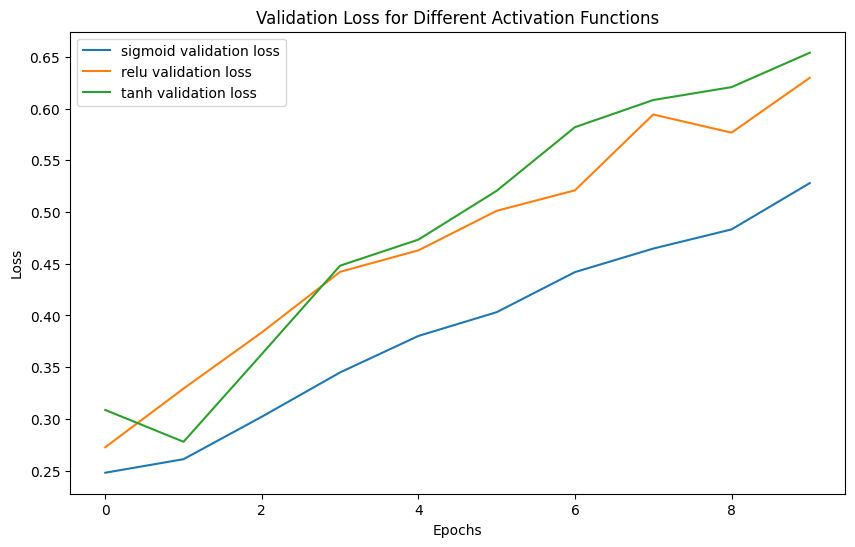

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8870 - loss: 0.5061
Test accuracy: 88.46%
Initial weights:
[[-0.04868664 -0.00302919  0.03123593  0.00868629  0.04404595]
 [ 0.06801977 -0.05353849 -0.01881989 -0.05093922  0.00658225]
 [ 0.00417175  0.01820369 -0.04180963  0.01466959 -0.00923265]
 [-0.00200971  0.03137785 -0.06622072  0.04962233 -0.01723278]
 [-0.02134658  0.01369383 -0.05028569  0.03493325  0.02703433]]

Updated weights after one epoch:
[[-0.0497067  -0.00241481  0.03249218  0.00850746  0.04403825]
 [ 0.06785239 -0.05346543 -0.01862592 -0.05101835  0.00657908]
 [ 0.00283401  0.01827206 -0.04054018  0.01460785 -0.00933601]
 [-0.00334837  0.03192569 -0.0649499   0.04957431 -0.01732038]
 [-0.02256554  0.01406373 -0.04910615  0.03474139  0.02700128]]

Weight changes:
[[-1.0200627e-03  6.1438349e-04  1.2562517e-03 -1.7883070e-04
  -7.7039003e-06]
 [-1.6737729e-04  7.3060393e-05  1.9396469e-04 -7.9132617e-05
  -3.1683594e-06]
 [-1.3377436e-03  6.8362802e-05  1.2694523e-0

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv('/content/Tweets - Tweets.csv')
df['label'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Feature extraction
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()
y = df['label'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model(activation='relu'):
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation=activation),
        Dense(32, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models with different activation functions
activations = ['sigmoid', 'relu', 'tanh']
histories = {}

for activation in activations:
    model = create_model(activation)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                        epochs=10, batch_size=32, verbose=0)
    histories[activation] = history

# Plot loss over epochs for each activation function
plt.figure(figsize=(10, 6))
for activation, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{activation} validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss for Different Activation Functions')
plt.show()

# Evaluate the best model (assuming ReLU performs best, which is often the case)
best_model = create_model('relu')
best_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Demonstrate weight updates during backpropagation
initial_weights = best_model.get_weights()[0][:5, :5]  # Get a small subset of weights
best_model.fit(X_train[:100], y_train[:100], epochs=1, batch_size=32, verbose=0)
updated_weights = best_model.get_weights()[0][:5, :5]

print("Initial weights:")
print(initial_weights)
print("\nUpdated weights after one epoch:")
print(updated_weights)
print("\nWeight changes:")
print(updated_weights - initial_weights)
